In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
sp.init_printing()

# Bestimmung des effektiven Volumens

$$V_{eff} = \int_V g(x,y,z)^m $$

## Beispiel a) Rechteckstab unter Biegung

$$ g(z) = \frac{2z}{h} $$

![](Kragarm.png)



Effekties Volumen berechnen

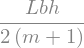

In [2]:
# symbole
b, h, L = sp.symbols('b h L') # geometrisch
z = sp.symbols('z') # koordinate
m = sp.symbols('m', positive=True) # Weibullmodul (m>0)

# dummy data zum plotten
data=[(b,1),(L,1),(h,1)]

# Gleichung aufstellen
g = 2*z / h

# integrieren
Veff = sp.integrate(g**m * b * L, (z,0,h/2))
display(Veff)

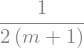

In [3]:
Veff.subs(data)

Effektives Volumen über m plotten

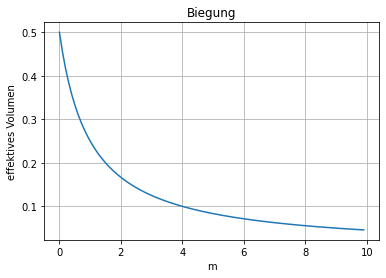

In [4]:
# matplotlib plot 

x_m = np.arange(0, 10, 0.1)
# turn SymPy-function into Python-function (with lambdify)
yBiegung = sp.lambdify(m,Veff.subs(data))
    
plt.plot(x_m,yBiegung(x_m))
plt.xlabel("m")
plt.ylabel("effektives Volumen")
plt.title("Biegung")
plt.grid()

## Beispiel b) Dreipunktbiegung eines Rechteckstabs

![](3pb.png)

Koordinatesystem mit Ursprung im Schwerpunkt
- x-Richtung -> Länge (Parameter l)
- y-Richtung -> Breite (Parameter b)
- z-Richtung -> Höhe (Parameter h)

![](3pb_Spannungsverlauf.png)

Zur Erstellung des Funktionsverlaufs:
- In unserem Fall wird x mit den jeweiligen Koordinaten (x,y,z) und y mit dem zugehörigen Spannungswert ersetzt

$$y = \frac{y_2-y_1}{x_2-x_1}(x-x_1)+y_1 $$

In [5]:
# symbole
b, h, l = sp.symbols('b h l') #geometrisch
x, y, z = sp.symbols('x y z') #Koordinaten
x1, x2 , y1 , y2 , z1 , z2 , s1 , s2 = sp.symbols('x_1 x_2 y_1 y_2 z_1 z_2 s_1 s_2') # Punkte zum erstellen des Spannungsverlaufs
s = sp.symbols('s') #Spannung (x,y,z)
m = sp.symbols('m', positive=True) # m>0

# dummy data zum plotten
data=[(b,1),(l,1),(h,1)]

Spannungsverlauf in **x-Richtung (Länge) für $-l/2$< $x$ < $0$**

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Wir betrachten nur  den Fall für -l/2< x < 0 (da der Fall symmetrisch ist, kann das effektive Volumen nachher einfach verdoppelt werden)
</div>

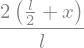

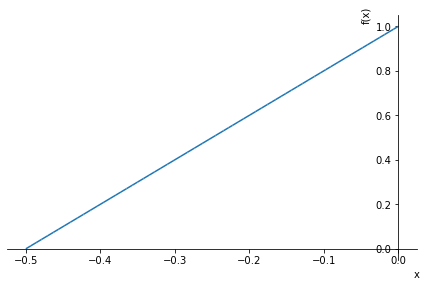

In [6]:
x1=-l/2
x2=0
s1=0 
s2=1
sx = (s2-s1)/(x2-x1) * (x-x1) + s1
display(sx)
sp.plot(sx.subs(data),(x,(-l/2).subs(data),0))

Spannungsverlauf in **z-Richtung (Höhe)** 


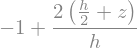

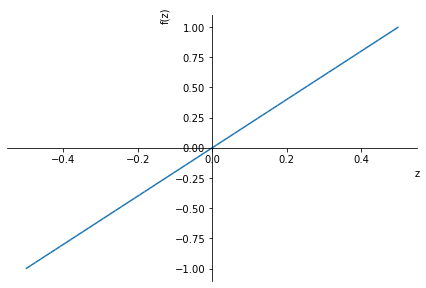

In [7]:
z1=-h/2
z2=h/2
s1=-1
s2=1
sz = ( (s2-s1)/(z2-z1) * (z-z1) + s1 ) 
display(sz)
sp.plot(sz.subs(data),(z,(-h/2).subs(data),(h/2).subs(data)))

Spannungsverlauf in **y-Richtung (Breite)**

Dieser ist konstant bei 1, wird aber trotzdem analog wie x und z hergeleitet

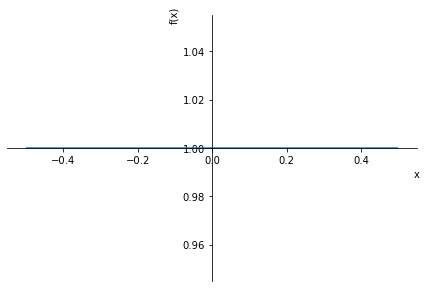

In [8]:
y1=-b/2
y2=b/2
s1=1
s2=1
sy = (s2-s1)/(y2-y1) * (y-y1) + s1
display(sy)
sp.plot(sy.subs(data),(y,(-b/2).subs(data),(b/2).subs(data)))

Integration für Spannungsverlauf (x,y,z) für **$-l/2$ < $x$ < $0$** 

- da der Verlauf für **$0$ < $x$ < $l/2$** analog ist können wir für das gesamte effektive Volumen den Wert x2 rechnen 

<div class="alert alert-block alert-danger">
<b>Warnung:</b> z nur von 0 bis h/2 integrieren da wir nur den positiven Bereich (Zugspannung) brauchen
</div>

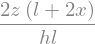

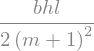

In [9]:
# Gleichung aufstellen
g = sx * sy * sz
display(g.simplify())

# integrieren
Veffhalb = sp.integrate(g**m, (x,-l/2,0),(y,-b/2,b/2),(z,0,h/2)) # z nur von 0 bis h/2 integrieren da wir nur den positiven Bereich brauchen
Veff = 2 * Veffhalb
display(Veff.simplify())

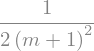

In [10]:
Veff.simplify().subs(data)

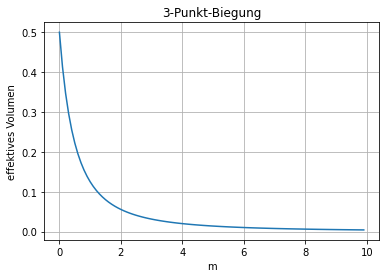

In [11]:
# matplotlib plot 

x_m = np.arange(0, 10, 0.1)
# turn SymPy-function into Python-function (with lambdify)
y3pb = sp.lambdify(m,Veff.subs(data))
    
plt.plot(x_m,y3pb(x_m))
plt.xlabel("m")
plt.ylabel("effektives Volumen")
plt.title("3-Punkt-Biegung")
plt.grid()

## Beispiel c) Vierpunktbiegung eines Rechteckstabs

![](4pb.png)

Koordinatesystem mit Ursprung im Schwerpunkt
- x-Richtung -> Länge (Parameter l)
- y-Richtung -> Breite (Parameter b)
- z-Richtung -> Höhe (Parameter h)

![](4pb_Spannungsverlauf.png)

Zur Erstellung des Funktionsverlaufs:
- In unserem Fall wird x mit den jeweiligen Koordinaten (x,y,z) und y mit dem zugehörigen Spannungswert ersetzt

$$y = \frac{y_2-y_1}{x_2-x_1}(x-x_1)+y_1 $$

In [12]:
# symbole
b, h, l1 , l2 = sp.symbols('b h l_1 l_2') #geometrisch
x, y, z = sp.symbols('x y z') #Koordinaten
x1, x2 , y1 , y2 , z1 , z2 , s1 , s2 = sp.symbols('x_1 x_2 y_1 y_2 z_1 z_2 s_1 s_2') # Punkte zum erstellen des Spannungsverlaufs
s = sp.symbols('s') #Spannung (x,y,z)
m = sp.symbols('m', positive=True) # m>0

# dummy data zum plotten
data=[(b,1),(l1,0.5),(l2,1),(h,1)]

Spannungsverlauf in **x-Richtung (Länge) für $-l_1/2$ < $x$ < $-l_2/2$**

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Wir betrachten nur  den Fall für -l/2< x < 0 (da der Fall symmetrisch ist, kann das effektive Volumen nachher einfach verdoppelt werden)
</div>

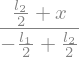

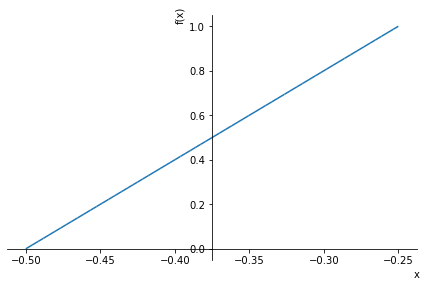

In [13]:
x1=-l2/2
x2=-l1/2
s1=0 
s2=1
sx1 = (s2-s1)/(x2-x1) * (x-x1) + s1
display(sx1)
sp.plot(sx1.subs(data),(x,(-l2/2).subs(data),(-l1/2).subs(data)))

Spannungsverlauf in **x-Richtung (Länge) für $-l_2/2$ < $x$ < $0$**

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Wir betrachten nur  den Fall für -l/2< x < 0 (da der Fall symmetrisch ist, kann das effektive Volumen nachher einfach verdoppelt werden)
</div>

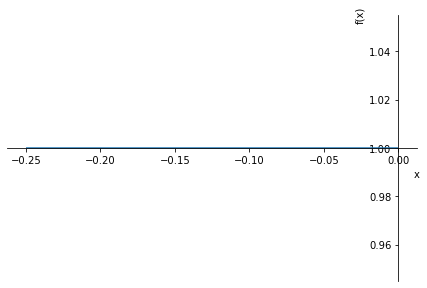

In [14]:
x1=-l1/2
x2=0
s1=1 
s2=1
sx2 = (s2-s1)/(x2-x1) * (x-x1) + s1
display(sx2)
sp.plot(sx2.subs(data),(x,(-l1/2).subs(data),0))

Spannungsverlauf in **z-Richtung (Höhe)** 


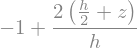

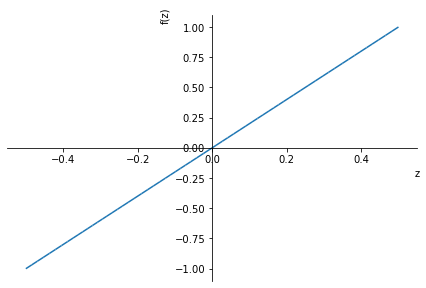

In [15]:
z1=-h/2
z2=h/2
s1=-1
s2=1
sz = ( (s2-s1)/(z2-z1) * (z-z1) + s1 ) 
display(sz)
sp.plot(sz.subs(data),(z,(-h/2).subs(data),(h/2).subs(data)))

Spannungsverlauf in **y-Richtung (Breite)**

Dieser ist konstant bei 1, wird aber trotzdem analog wie x und z hergeleitet

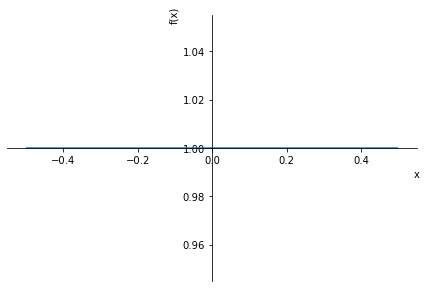

In [16]:
y1=-b/2
y2=b/2
s1=1
s2=1
sy = (s2-s1)/(y2-y1) * (y-y1) + s1
display(sy)
sp.plot(sy.subs(data),(y,(-b/2).subs(data),(b/2).subs(data)))

Integration für Spannungsverlauf (x,y,z) für **$-l2/2$ < $x$ < $0$** 

- da der Verlauf für **$0$ < $x$ < $l2/2$** analog ist können wir für das gesamte effektive Volumen den Wert x2 rechnen 

<div class="alert alert-block alert-danger">
<b>Warnung:</b> z nur von 0 bis h/2 integrieren da wir nur den positiven Bereich (Zugspannung) brauchen
</div>

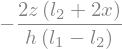

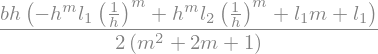

In [17]:
# Gleichung aufstellen
g1 = sx1 * sy * sz
g1 = g1.simplify()
display(g1)

g2 = sx2 * sy * sz
g2 = g2.simplify()
display(g2)


# integrieren
Veffhalb1 = sp.integrate(g1**m, (x,-l2/2,-l1/2),(y,-b/2,b/2),(z,0,h/2)) # z nur von 0 bis h/2 integrieren da wir nur den positiven Bereich brauchen
#Veffhalb1 = Veffhalb1.simplify()
Veffhalb2 = sp.integrate(g2**m, (x,-l1/2,0),(y,-b/2,b/2),(z,0,h/2)).simplify() # z nur von 0 bis h/2 integrieren da wir nur den positiven Bereich brauchen
#Veffhalb2 = Veffhalb2.simplify()

Veff = 2 * (Veffhalb1 + Veffhalb2)
Veff = Veff.simplify()
display(Veff)

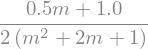

In [18]:
Veff.simplify().subs(data)

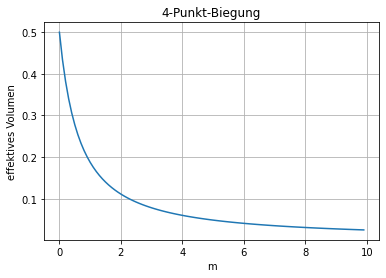

In [19]:
# matplotlib plot 

x_m = np.arange(0, 10, 0.1)
# turn SymPy-function into Python-function (with lambdify)
y4pb = sp.lambdify(m,Veff.subs(data))
    
plt.plot(x_m,y4pb(x_m))
plt.xlabel("m")
plt.ylabel("effektives Volumen")
plt.title("4-Punkt-Biegung")
plt.grid()

## Vergleich aller drei Variante mit Zug

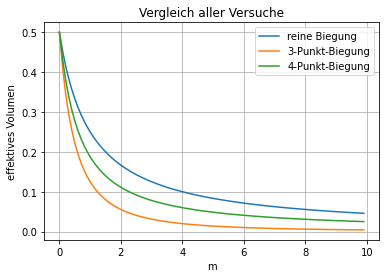

In [23]:
# matplotlib plot 

x_m = np.arange(0, 10, 0.1)
# turn SymPy-function into Python-function (with lambdify)



plt.plot(x_m,yBiegung(x_m),label="reine Biegung")
plt.plot(x_m,y3pb(x_m),label="3-Punkt-Biegung")
plt.plot(x_m,y4pb(x_m),label="4-Punkt-Biegung")

plt.legend()
plt.xlabel("m")
plt.ylabel("effektives Volumen")
plt.title("Vergleich aller Versuche")
plt.grid()